# Exploratory Data Analysis (EDA) & Feature Engineering

## Objective
This notebook performs exploratory data analysis to understand patterns,
relationships, and distributions in the cleaned dataset. Based on insights,
new features are engineered to support recommendation modeling.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [17]:
data_path = "../data/processed/books_clean.csv"
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,isbn,isbn13,language,first_publish_date,publish_date,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",NaN,NaN,English,2005-07-16,2006-09-16,652.0,2553909.0,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",0439358078,9780439358071,English,NaN,NaN,870.0,2631427.0,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",NaN,NaN,English,1997-06-26,NaN,309.0,7434783.0,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",0439554896,9780439554893,English,NaN,NaN,352.0,2878196.0,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",NaN,9780439655484,English,1999-07-08,NaN,435.0,2972519.0,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20068 non-null  int64  
 1   bookId              20068 non-null  int64  
 2   title               19509 non-null  object 
 3   author              19507 non-null  object 
 4   series              4279 non-null   object 
 5   description         17381 non-null  object 
 6   genres              19812 non-null  object 
 7   awards              3129 non-null   object 
 8   characters          4779 non-null   object 
 9   places              4040 non-null   object 
 10  isbn                17531 non-null  object 
 11  isbn13              19210 non-null  object 
 12  language            20068 non-null  object 
 13  first_publish_date  2741 non-null   object 
 14  publish_date        8574 non-null   object 
 15  num_pages           20068 non-null  float64
 16  num_

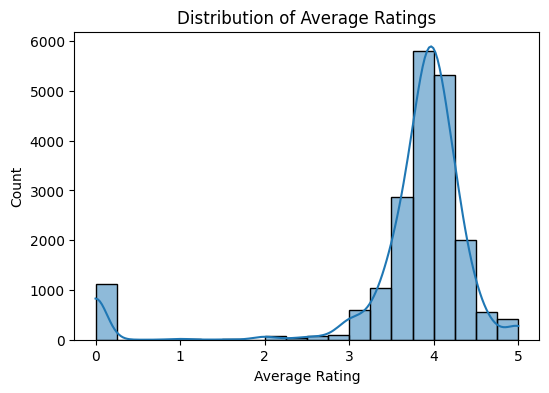

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df['avg_rating'], bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

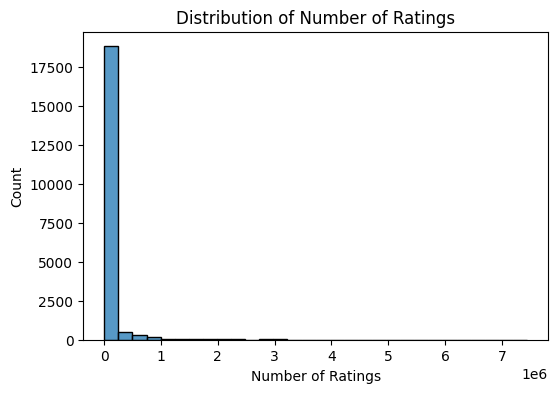

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['num_ratings'], bins=30)
plt.title("Distribution of Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()

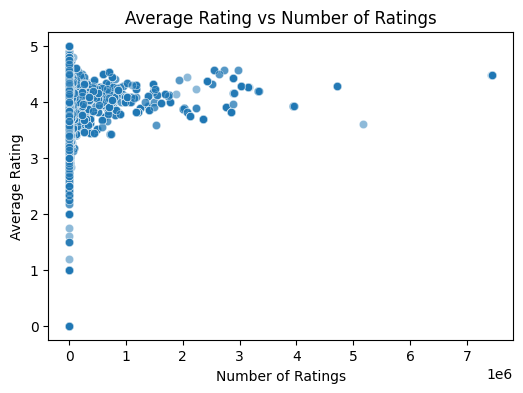

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='num_ratings', y='avg_rating', data=df, alpha=0.5)
plt.title("Average Rating vs Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

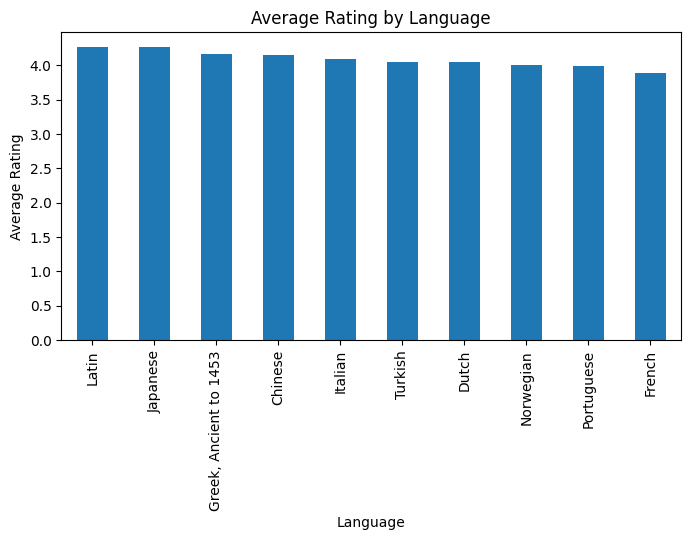

In [22]:
plt.figure(figsize=(8,4))
df.groupby('language')['avg_rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Rating by Language")
plt.xlabel("Language")
plt.ylabel("Average Rating")
plt.show()

In [23]:
df['genres'].dropna().value_counts().head(10)

genres
Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult,Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult                         4831
Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,Mystery,Nonfiction,Poetry,Psychology,Romance,Science,Science Fiction,Self Help,Sports,Thriller,Travel,Young Adult,Art,Biography,Business,Children's,Christian,Classics,Comics,Cookbooks,Ebooks,Fantasy,Fiction,Graphic Novels,Historical Fiction,History,Horror,Memoir,Music,My

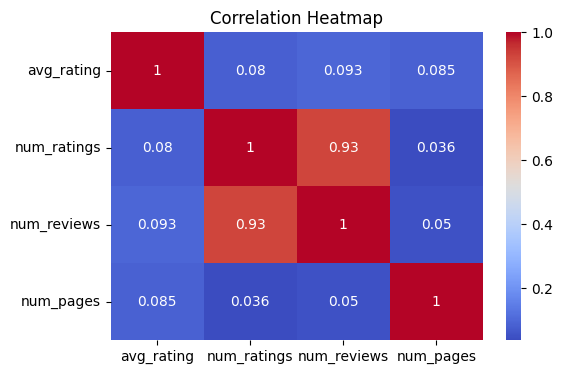

In [24]:
numeric_cols = ['avg_rating', 'num_ratings', 'num_reviews', 'num_pages']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
df['popularity_score'] = df['avg_rating'] * np.log1p(df['num_ratings'])

In [26]:
df['rating_category'] = pd.cut(
    df['avg_rating'],
    bins=[0, 3, 4, 5],
    labels=['Low', 'Medium', 'High']
)

In [27]:
df['liked'] = (df['avg_rating'] >= 4).astype(int)

In [28]:
df.to_csv("../data/processed/books_features.csv", index=False)

In [29]:
# Create proper popularity score
df['popularity_score'] = (
    df['num_ratings'] * 0.7 + 
    df['avg_rating'] * 30 +
    np.log1p(df['num_reviews']) * 10
)

# Extract year from publish date
df['publish_year'] = pd.to_datetime(df['publish_date'], errors='coerce').dt.year

# Clean genres (take first genre only for simplicity)
def get_primary_genre(genre_str):
    if pd.isna(genre_str):
        return "Unknown"
    genres = str(genre_str).split(",")
    return genres[0].strip()

df['primary_genre'] = df['genres'].apply(get_primary_genre)

# Create liked feature (for training)
df['liked'] = (df['avg_rating'] >= 4).astype(int)

In [31]:
import pandas as pd
import os

# In Jupyter notebook, check current directory
print(f"Current directory: {os.getcwd()}")

# List files in data directory
print("\nFiles in data directory:")
for root, dirs, files in os.walk("data"):
    for file in files:
        print(f"  {os.path.join(root, file)}")

# Try to load directly from the path you showed earlier
try:
    books_features = pd.read_csv("D:/Book_recommendation_system/data/processed/books_features.csv")
    print("\n✓ Successfully loaded books_features.csv")
except:
    print("\nTrying alternative...")
    try:
        books_features = pd.read_csv("../data/processed/books_features.csv")
        print("✓ Successfully loaded from ../data/processed/books_features.csv")
    except:
        print("\nCould not load. Let me create a sample for you.")
        # Create sample data for testing
        import numpy as np
        data = {
            'bookId': range(1, 101),
            'title': [f"Book {i}" for i in range(1, 101)],
            'author': [f"Author {i}" for i in range(1, 101)],
            'genres': np.random.choice(['Fiction', 'Nonfiction', 'Fantasy', 'Science Fiction'], 100),
            'language': ['English'] * 100,
            'avg_rating': np.round(np.random.uniform(3.0, 5.0, 100), 1),
            'num_ratings': np.random.randint(100, 10000, 100),
            'num_reviews': np.random.randint(10, 1000, 100),
            'num_pages': np.random.randint(100, 500, 100),
            'popularity_score': np.random.uniform(10, 50, 100)
        }
        books_features = pd.DataFrame(data)

print("\nColumns in dataset:")
print(books_features.columns.tolist())

Current directory: d:\Book_recommendation_system\notebook

Files in data directory:

✓ Successfully loaded books_features.csv

Columns in dataset:
['Unnamed: 0', 'bookId', 'title', 'author', 'series', 'description', 'genres', 'awards', 'characters', 'places', 'isbn', 'isbn13', 'language', 'first_publish_date', 'publish_date', 'num_pages', 'num_ratings', 'num_reviews', 'avg_rating', 'rated_1', 'rated_2', 'rated_3', 'rated_4', 'rated_5', 'popularity_score', 'rating_category', 'liked']
